<!--NAVIGATION-->
< [Algorithms and Inference](01.01.Algorithms-and-Inference.ipynb) | [Conteúdo](Index.ipynb) | [Bayesian Inference] >

<a href="https://colab.research.google.com/github/fmafonseca/casi/blob/master/notebooks/01.02.Frequentist-Inference.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

# 2 Frequentist Inference

### Glomerular Filtration data of Table 2.1 and elsewhere

Os dados utilizados aqui são os disponibilizados no próprio site do livro através da URL https://web.stanford.edu/~hastie/CASI/data.html.

Dados:
- *Measurements of glomerular filtration rate for 211 kidney patients from the Nephrology laboratory of Dr Bryan Myers at Stanford University.*
- https://web.stanford.edu/~hastie/CASI_files/DATA/gfr.txt

In [6]:
import pandas as pd

gfr_df = pd.read_csv("data/gfr.txt", delimiter=' ', header=None)
gfr_df.columns = ['glr'] # rename column to 'glr'
gfr_df.head()

,glr
0,108
1,91
2,62
3,59
4,84


Esta seção se refere ao exemplo abaixo do livro:

<blockquote>
<em>We begin with another example from Dr. Myers’ nephrology laboratory: $211$ kidney patients have had their glomerular filtration rates measured, with the results shown in Figure 2.1; <strong><font color=green>gfr</font></strong> is an important indicator of kidney function, with low values suggesting trouble. (It is a key component of <strong><font color=green>tot</font></strong> in Figure 1.1). The mean and standard error (1.1)–(1.2) are $\bar{x}=54.25$ and $\hat{se}=0.95$, typically reported as</em>

<p>
 $$
54.25 \pm 0.95
$$
</p>

<p>
$\pm 0.95$ <em>denotes a <mark>frequentist inference</mark> for the accuracy of the estimate $\bar{x}=54.25$, and <mark>suggests that we shouldn’t take the “$.25$” very seriously, even the “$4$” being open to doubt.</mark></em>
</p>

<p>
<small>(Fonte: <em>Efron, B., & Hastie, T. (2016). Computer Age Statistical Inference: Algorithms, Evidence, and Data Science. Cambridge: Cambridge University Press.</em>)</small>
</p>
</blockquote>

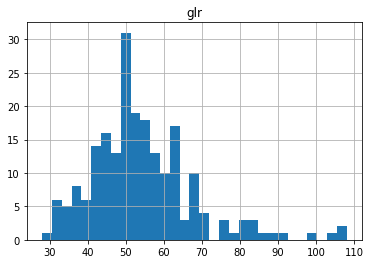

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

# Figure 2.1 Glomerular filtration rates for 211 kidney patients
figure_2_1 = gfr_df.hist(column='glr', bins=31)

In [21]:
import numpy as np

n = len(gfr_df.index)
mean_glr = gfr_df.glr.mean()
estimated_se_glr = gfr_df.glr.std() / np.sqrt(n)

print("Number of glr measurements = {0}".format(n))
print("Mean of glr measurements = {0:.2f}".format(mean_glr))
print("Estimated standard error for mean of glr measurements = {0:.2f}".format(estimated_se_glr))

Number of glr measurements = 211
Mean of glr measurements = 54.27
Estimated standard error for mean of glr measurements = 0.94


É possível perceber que os números calculados aqui a partir do *[data set](https://web.stanford.edu/~hastie/CASI_files/DATA/gfr.txt)* disponibilizado no site do livro estão ligeiramente diferentes do livro, ou seja, $\bar{x}=54.27$ ao invés de $\bar{x}=54.25$ e $\hat{se}=0.94$ ao invés de $\hat{se}=0.95$. Porém, isto não invalida o exemplo.

Mas de onde vem esta **inferência frequentista** $\hat{se}$ a respeito da acurácia da estimativa $\bar{x}$?

<blockquote>
<mark>Statistical inference usually begins with the assumption that some probability model has produced the observed data</mark> $x$, in our case the vector of $n=211$ <strong><font color=green>gfr</font></strong> measurements $x = \left( x_1, x_2, \ldots, x_n \right)$. Let $X = \left( X_1, X_2, \ldots, X_n \right)$ indicate $n$ independent draws from a probability distribution $F$, written

<p>
$$
F \rightarrow X
$$
</p>

<p>
$F$ being the underlying distribution of possible <strong><font color=green>gfr</font></strong> scores here. A realization $X=x$ of $F \rightarrow X$ has been observed, and the statistician wishes to <mark><em>infer</em></mark> some property of the unknown distribution $F$.
</p>

<p>
Suppose the desired property is the <em>expectation</em> of a single random draw $X$ from $F$, denoted
</p>

<p>
$$
\theta = E_F \{ X \}
$$
</p>

<p>
The obvious estimate of $\theta$ is $\hat{\theta}=\bar{x}$, the sample average. If $n$ were enormous, say $10^{10}$, we would expect $\hat{\theta}$ to nearly equal $\theta$, but otherwise there is room for error. <mark>How much error is the inferential question</mark>.
</p>

<p>
The estimate $\hat{\theta}$ is calculated from $x$ according to some known algorithm, say
</p>

<p>
$$
\hat{\theta} = t \left( x \right) \text{,}
$$
</p>

<p>
$t \left( x \right)$ in our example being the averaging function $\bar{x} = \sum_{i=1}^n \frac{x_i}{n}$; $\hat{\theta}$ is a realization of
</p>

<p>
$$
\hat{\Theta} = t \left( X \right) \text{,}
$$
</p>

<p>
the output of $t \left( . \right)$ applied to a theoretical sample $X$ from $F$. We have chosen $t \left( X \right)$, we hope, to make‚ $\hat{\Theta}$ a good estimator of $\theta$, the desired property of $F$.
</p>

<p>
We can now give a <font color=magenta>first definition of frequentist inference</font>: <mark><em>the accuracy of an observed estimate $\hat{\theta} = t \left( x \right)$ is the probabilistic accuracy of $\hat{\Theta} = t \left( X \right)$ as an estimator of $\theta$</em></mark>. This may seem more a tautology than a definition, but it contains a powerful idea: <mark>$\hat{\theta}$ is just a single number but $\hat{\Theta}$ takes on a range of values whose spread can define measures of accuracy</mark>.
</p>

<p>
<small>(Fonte: <em>Efron, B., & Hastie, T. (2016). Computer Age Statistical Inference: Algorithms, Evidence, and Data Science. Cambridge: Cambridge University Press.</em>)</small>
</p>
</blockquote>

Então, no exemplo do livro temos até o momento que:
- $F$ é a distribuição de possíveis valores de **<font color=green>gfr</font>**, ou seja, é o modelo probabilístico que gerou as $n=211$ observações $x = \left( x_1, x_2, \ldots, x_n \right)$ de valores de **<font color=green>gfr</font>**.
- Estamos interessados em descobrir o valor esperado (*expctation*) de um único sorteio aleatório $X$ a partir de $F$, ou seja, queremos saber qual o valor de $\theta = E_F \{ X \}$. Mas não temos $F$.
- Uma estimativa para $\theta$ é $\hat{\theta}$, ou seja, $\theta \approx \hat{\theta} = t \left( x \right) = \bar{x} = \sum_{i=1}^n \frac{x_i}{n} = 54.27$.
- Mas dado que $\hat{\theta}$ é uma aproximação, então, qual a nossa incerteza em relação a $\hat{\theta}=54.27$?
- Da mesma forma que $x = \left( x_1, x_2, \ldots, x_n \right)$ é uma realização de $X$ (que é uma amostra teórica gerada a partir de $F$), $\hat{\theta}=t \left( x \right)=54.27$ também pode ser visto como uma realização de $\hat{\Theta}=t \left( X \right)$ (que representa os possíveis valores resultantes de $t \left( . \right)$ aplicados a possíveis amostras teóricas $X$ geradas a partir de $F$).
- Então, $\hat{\Theta}$ pode assumir um intervalo de valores cuja a variação destes valores pode definir uma medida de incerteza.
- Logo, aproveitando a primeira definição de inferência frequentista de que "<mark><em>the accuracy of an observed estimate $\hat{\theta} = t \left( x \right)$ is the probabilistic accuracy of $\hat{\Theta} = t \left( X \right)$ as an estimator of $\theta$</em></mark>", podemos utilizar a variação de $\hat{\Theta}$ como uma medida da incerteza para a nossa estimativa $\hat{\theta}=54.27$.

Mas como podemos medir esta incerteza?

<blockquote>
<mark>Bias and variance are familiar examples of frequentist inference</mark>. Define $\mu$ to be the expectation of $\hat{\Theta} = t \left( X \right)$ under model $F \rightarrow X$,

<p>
$$
\mu = E_F \{ \hat{\Theta} \} \text{.}
$$
</p>

<p>
Then the bias and variance attributed to estimate $\hat{\theta}$ of parameter $\theta$ are
</p>

<p>
$$
\text{bias} = \mu - \theta \enspace \text{ and } \enspace \text{var} = E_F \left\{ \left( \hat{\Theta} - \mu \right)^2 \right\}
$$
</p>

<p>
Again, what keeps this from tautology is the attribution to the single number $\hat{\theta}$ of the probabilistic properties of $\hat{\Theta}$ following from model $F \rightarrow X$.
</p>

<p>
<small>(Fonte: <em>Efron, B., & Hastie, T. (2016). Computer Age Statistical Inference: Algorithms, Evidence, and Data Science. Cambridge: Cambridge University Press.</em>)</small>
</p>
</blockquote>

<blockquote>
<mark>Frequentism is often defined with respect to “an infinite sequence of future trials”</mark>. We imagine hypothetical data sets $X^{(1)}, X^{(2)}, X^{(3)}, \ldots$ generated by the same mechanism as $x$ providing corresponding values $\hat{\Theta}^{(1)}, \hat{\Theta}^{(2)}, \hat{\Theta}^{(3)}, \ldots$ as in $\hat{\Theta} = t \left( X \right)$. <mark>The frequentist principle is then to attribute for $\hat{\theta}$ the accuracy properties of the ensemble of $\hat{\Theta}$ values</mark>.

<p>
<small>(Fonte: <em>Efron, B., & Hastie, T. (2016). Computer Age Statistical Inference: Algorithms, Evidence, and Data Science. Cambridge: Cambridge University Press.</em>)</small>
</p>
</blockquote>

## 2.1 Frequentism in Practice

A pergunta de antes ainda permanece, ou seja, como podemos medir, na prática, a variação de $\hat{\Theta}$ e utilizá-la como uma medida da incerteza para a nossa estimativa $\hat{\theta}=54.27$?

<blockquote>
Our working definition of frequentism is that <mark><em>the probabilistic properties of a procedure of interest are derived and then applied verbatim to the procedure’s output for the observed data</em>. This has an obvious defect: it requires calculating the properties of estimators $\hat{\Theta} = t \left( X \right)$ obtained from the true distribution $F$, even though $F$ is unknown</mark>. Practical frequentism uses a collection of more or less ingenious devices to circumvent the defect.

<p>
<strong><em>1. The plug-in principle.</em></strong> A simple formula relates the standard error of $\bar{X} = \sum_{i=1}^n \frac{X_i}{n}$ to $\text{var}_F \left( X \right)$, the variance of a single $X$ drawn from $F$,
</p>

<p>
$$
se \left( \bar{X} \right) = \left[ \frac{\text{var}_F \left( X \right)}{n} \right]^{\frac{1}{2}} \text{.} \enspace \enspace \text{(2.8)}
$$
</p>

<p>
But having observed $x = \left( x_1, x_2, \ldots, x_n \right)$ we can estimate $\text{var}_F \left( X \right)$ without bias by
</p>

<p>
$$
\hat{\text{var}}_F = \frac{\sum_{i=1}^n \left( x_i - \bar{x} \right)^2}{n-1} \text{.} \enspace \enspace \text{(2.9)}
$$
</p>

<p>
Plugging formula (2.9) into (2.8) gives $\hat{se} = \left[ \frac{\sum_{i=1}^n \left( x_i - \bar{x} \right)^2}{\left( n \left( n-1 \right) \right)} \right]^{\frac{1}{2}}$, the usual estimate for the standard error of an average $\bar{x}$. In other words, the frequentist accuracy estimate for $\bar{x}$ is itself estimated from the observed data.
</p>

<p>
<small>(Fonte: <em>Efron, B., & Hastie, T. (2016). Computer Age Statistical Inference: Algorithms, Evidence, and Data Science. Cambridge: Cambridge University Press.</em>)</small>
</p>
</blockquote>

Então, utilizando **(1)** a <font color=magenta>definição de inferência frequentista</font> de que "<mark><em>the accuracy of an observed estimate $\hat{\theta} = t \left( x \right)$ is the probabilistic accuracy of $\hat{\Theta} = t \left( X \right)$ as an estimator of $\theta$</em></mark>" e utilizando **(2)** o *<font color=magenta>plug-in principle</font>* temos que:
- **(1a)**: pelo Teorema Central do Limite (*Central Limit Theorem - CLT*), sob certas condições ([mais detalhes aqui](https://fmafonseca.github.io/statistical-thinking-data-science/001.teorema-central-do-limite.html)), a distribuição das <font color=blue>médias das amostras</font> (*<font color=blue>sample means</font>*) $\bar{X}$ é aproximadamente normal (*nearly normal*), centrada na <font color=orange>média da população</font> (*<font color=orange>population mean</font>*) $\mu_{pop}$, e com um <font color=blue>desvio padrão</font> (*<font color=blue>standard deviation</font>*) $SE$ igual ao <font color=orange>desvio padrão da população</font> (*<font color=orange>population standard deviation</font>*) $\sigma$ dividido pela raiz quadrada do <font color=gray>tamanho das amostras</font> (*<font color=gray>samples size</font>*) $n$.

$$
\bar{X} \sim N\left(mean=\mu_{pop}, SE=\frac{\sigma}{\sqrt{n}}\right)
$$

- **(1b)**: fazendo a ligação entre o Teorema Central do Limite (*Central Limit Theorem - CLT*) e o exemplo do livro, temos que:
  - $\bar{X}$ está para $\hat{\Theta}$, assim como,
  - $\mu_{pop}$ está para $\theta = E_F \{ X \}$, assim como,
  - $SE$ está para $se \left( \bar{X} \right)$, logo, temos como propriedades probabilísticas para $\hat{\Theta}$ o seguinte:

$$
\hat{\Theta} \sim N\left(mean=\theta=E_F\{X\}, \enspace SE=\frac{\sigma_F}{\sqrt{n}}=\left[ \frac{\text{var}_F \left( X \right)}{n} \right]^{\frac{1}{2}}\right)
$$

- **(1c)**: e pela <font color=magenta>definição de inferência frequentista</font>, então, podemos assumir que a incerteza da estimativa $\hat{\theta}=54.27$ será medida pelo erro padrão (*standard deviation*) $SE=\frac{\sigma_F}{\sqrt{n}}$ de $\hat{\Theta}$.

- **(2)** : e, finalmente, pelo *<font color=magenta>plug-in principle</font>* podemos estimar o desvio padrão $\sigma_F$ de $F$ através do desvio padrão $s$ do que foi observado via $x = \left( x_1, x_2, \ldots, x_n \right)$. Que é a mesma coisa do que estimar $\text{var}_F \left( X \right)$ através de $\hat{\text{var}}_F$ (equação 2.9 do livro).

É deste modo que chegamos em

$$
\hat{\theta} \pm \hat{se} \enspace \Rightarrow \enspace 54.27 \pm 0.94
$$

In [22]:
n = len(gfr_df.index)
mean_glr = gfr_df.glr.mean()
estimated_se_glr = gfr_df.glr.std() / np.sqrt(n)

print("Number of glr measurements = {0}".format(n))
print("Mean of glr measurements = {0:.2f}".format(mean_glr))
print("Estimated standard error for mean of glr measurements = {0:.2f}".format(estimated_se_glr))

Number of glr measurements = 211
Mean of glr measurements = 54.27
Estimated standard error for mean of glr measurements = 0.94


<!--NAVIGATION-->
< [Algorithms and Inference](01.01.Algorithms-and-Inference.ipynb) | [Conteúdo](Index.ipynb) | [Bayesian Inference] >

<a href="https://colab.research.google.com/github/fmafonseca/casi/blob/master/notebooks/01.02.Frequentist-Inference.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>